In [22]:
b = 8
a = !./term 10000000 $b

In [23]:
for x in a:
    print x

Расчетное значение: интеграл функции от 0.00 до 2.00: 2.483889662314225
Точное значение: интеграл    функции от  0.00 до 2.00: 2.483890710361089
Абсолютная погрешность: 0.000001048046864
Относительная погрешность: 0.000042193759171
Использовано 10000000 шагов 8 потоков.
Время работы в секундах 0.031773


In [8]:
def ParseResult(a):
    OP = float(a[3].split(":")[1])
    tick_time = float(a[5].split(" ")[4])
    return (OP, tick_time)

In [9]:
print(ParseResult(a))

(4.2193759171e-05, 0.038353)


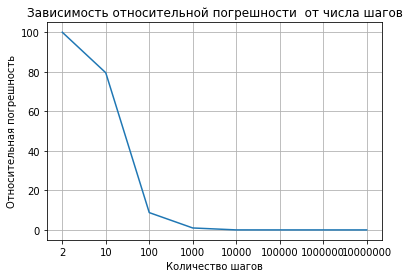

In [24]:
import matplotlib.pyplot as plt
import numpy as np

nums = [2,10,100,1000,10000,100000,1000000,10000000]
OPs = []
for num_steps in nums:
    a = !./term $num_steps 10
    OPs.append(ParseResult(a)[0])
#print(OPs)
#plt.xlabel = "Test"
#plt.plot(OPs)
fig, ax = plt.subplots()

ax.plot(list(map(str, nums)),OPs)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel(u'Количество шагов')
ax.set_ylabel(u'Относительная погрешность')
ax.set_title(u'Зависимость относительной погрешности  от числа шагов')
plt.show()
#print(np.array(OPs).min())

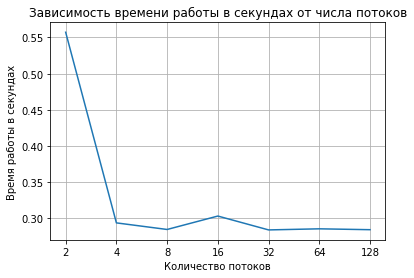

In [11]:
import matplotlib.pyplot as plt
import numpy as np

nums =  [2,4,8,16,32,64,128]
OPs = []
for num_threads in nums:
    a = !./term 100000000 $num_threads
    OPs.append(ParseResult(a)[1])
fig, ax = plt.subplots()

ax.plot(list(map(str, nums)),OPs)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel(u'Количество потоков')
ax.set_ylabel(u'Время работы в секундах')
ax.set_title(u'Зависимость времени работы в секундах от числа потоков')
plt.show()

In [12]:
print(nums[(-1*np.array(OPs)).argmax()])
print OPs[2]

32
0.284079


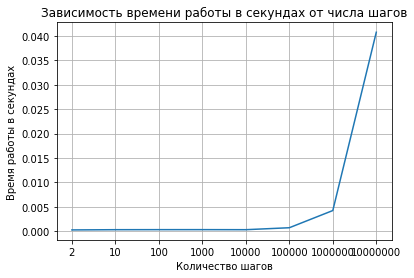

In [13]:
import matplotlib.pyplot as plt
import numpy as np

nums =  [2,10,100,1000,10000,100000,1000000,10000000]
OPs = []
for num_steps in nums:
    a = !./term $num_steps 6
    OPs.append(ParseResult(a)[1])
#print(nums)
#plt.plot(OPs)
fig, ax = plt.subplots()

ax.plot(list(map(str, nums)),OPs)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel(u'Количество шагов')
ax.set_ylabel(u'Время работы в секундах')
ax.set_title(u'Зависимость времени работы в секундах от числа шагов')
plt.show()

In [14]:
print np.array(OPs).max()

0.040767


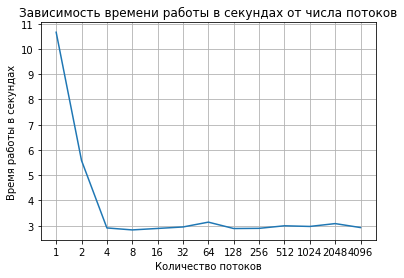

2.82877
3


In [15]:
import matplotlib.pyplot as plt
import numpy as np

nums =  2**(np.array(range(13)))
OPs = []
for num_threads in nums:
    a = !./term 1000000000 $num_threads
    OPs.append(ParseResult(a)[1])
fig, ax = plt.subplots()

ax.plot(list(map(str, nums)),OPs)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel(u'Количество потоков')
ax.set_ylabel(u'Время работы в секундах')
ax.set_title(u'Зависимость времени работы в секундах от числа потоков')
plt.show()
test = np.array(OPs)
print test.min()
print test.argmin()

In [16]:
a = !./term 1000000000 1
T1 = ParseResult(a)[1]

acceleration = T1/np.array(OPs)
effects = np.array(OPs)/nums

In [25]:
print nums[3]

1000


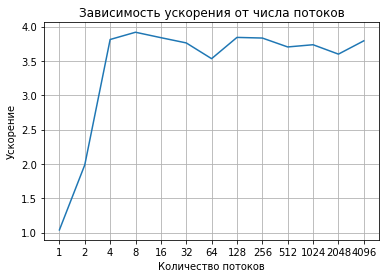

3.9176398222549027
3


In [18]:
fig, ax = plt.subplots()

ax.plot(list(map(str, nums)),acceleration)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel(u'Количество потоков')
ax.set_ylabel(u'Ускорение')
ax.set_title(u'Зависимость ускорения от числа потоков')
plt.show()
print acceleration.max()
print acceleration.argmax()

In [19]:
print(nums[acceleration.argmax()])

8


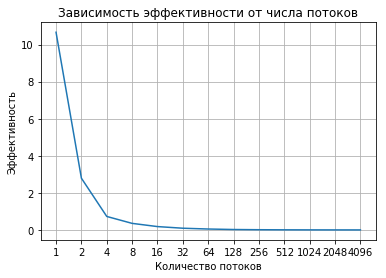

In [20]:
fig, ax = plt.subplots()

ax.plot(list(map(str, nums)),effects)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel(u'Количество потоков')
ax.set_ylabel(u'Эффективность')
ax.set_title(u'Зависимость эффективности от числа потоков')
plt.show()

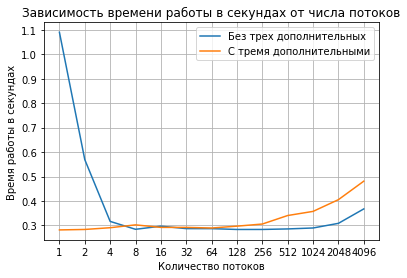

In [21]:
import matplotlib.pyplot as plt
import numpy as np

nums =  2**(np.array(range(13)))
OPs = []
OPs_2 = []
for num_threads in nums:
    a = !./term 100000000 $num_threads
    OPs.append(ParseResult(a)[1])
    b = !./term3 100000000 $num_threads
    OPs_2.append(ParseResult(b)[1])
fig, ax = plt.subplots()

ax.plot(list(map(str, nums)),OPs)
ax.plot(list(map(str, nums)),OPs_2)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel(u'Количество потоков')
ax.set_ylabel(u'Время работы в секундах')
ax.set_title(u'Зависимость времени работы в секундах от числа потоков')
plt.legend( (u"Без трех дополнительных", u"С тремя дополнительными") )
plt.show()